In [1]:
#Import packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import contextily as cx
import mplleaflet
import folium

In [ ]:
# install new packages
#import sys 
#!pip install folium

In [2]:
# read in acoustic metadata, parse date columns
ccb = pd.read_csv("../Data/CCB Metadata.csv",
                 sep = ',',
                 encoding = 'utf-8',
                 parse_dates = ['deployDate', 'recoveryDate'])
ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000


In [3]:
# create separate fields for deployment day, month and year
ccb['depYear'] = ccb['deployDate'].dt.year

ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   c_recordOnDays            38 non-null     int64         
 1   c_uniqueUnitID            38 non-null     object        
 2   deployDate                38 non-null     datetime64[ns]
 3   deploymentDepth_Meters    30 non-null     float64       
 4   dutyCycle_Flag            38 non-null     object        
 5   latitudeDeployed_DecDeg   38 non-null     float64       
 6   longitudeDeployed_DecDeg  38 non-null     float64       
 7   recoveryDate              38 non-null     datetime64[ns]
 8   samplingRate_Hz           38 non-null     int64         
 9   depYear                   38 non-null     int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 3.1+ KB


In [4]:
# create geodataframe
geom = [Point(xy) for xy in zip(ccb['longitudeDeployed_DecDeg'], ccb['latitudeDeployed_DecDeg'])]
ccb_gdf = gpd.GeoDataFrame(ccb, geometry = geom, crs = 4269)

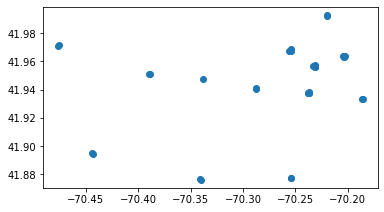

In [5]:
# quick plot
ccb_gdf.plot();

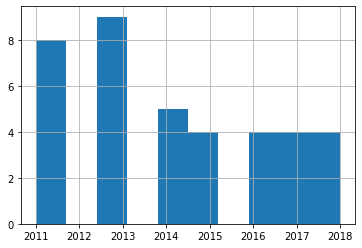

In [6]:
# distribution of deployment years
ccb_gdf['depYear'].hist(); # weird spacing..

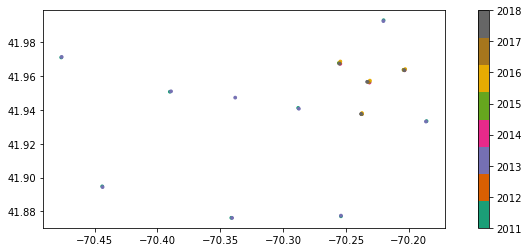

In [6]:
# plot all ccb hydrophones, color by year
ccb_gdf.plot(    
    column = 'depYear',
    cmap = 'Dark2',
    legend = True,
    marker = '.',
    markersize = 30,
    alpha = 1,
    figsize = (12,4));

# show with leaflet
#mplleaflet.show() # data must be in geographic projection

In [ ]:
cx.providers.Esri.keys()

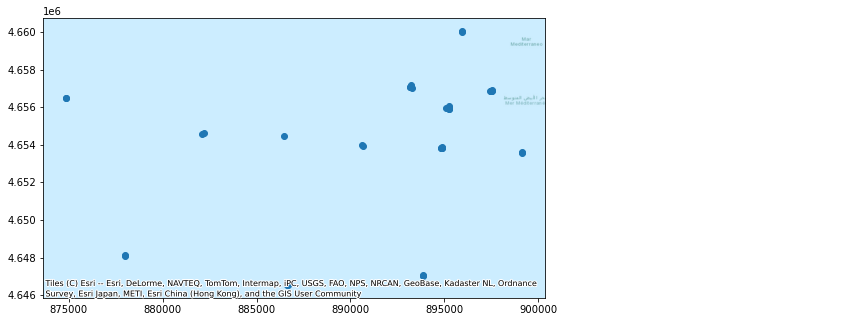

In [7]:
# set ccb_gdf to UTM zone 18N (26918)
ax = ccb_gdf.to_crs('EPSG:26918').plot(figsize=(9, 9))

# plot with basemap via contextily
cx.add_basemap(ax,source=cx.providers.Esri.WorldTopoMap)

# show with leaflet
#mplleaflet.show() >> 

### Plot with folium

In [ ]:
# fancy stuff - (with time) https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/

In [8]:
ccb_gdf.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,geometry
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,POINT (-70.28800 41.94120)
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,POINT (-70.25400 41.87710)
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,POINT (-70.44390 41.89480)
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,POINT (-70.18590 41.93340)
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,POINT (-70.39010 41.95080)


In [9]:
# specify center of map (cape cod bay)
medianLat = ccb_gdf['latitudeDeployed_DecDeg'].median()
medianLng = ccb_gdf['longitudeDeployed_DecDeg'].median()
print (medianLat,medianLng)

41.9563 -70.2378205


In [16]:
# create map object called m
map_blank = folium.Map(location = [medianLat,medianLng],
              zoom_start = 9)

map_blank

In [11]:
# big marker
bigMarker = folium.CircleMarker(location = [medianLat,medianLng],
                               color = 'blue',
                               fill = True,
                               fill_opacity = 0.2,
                               radius = 20,
                               tooltip = 'Map Center')

bigMarker.add_to(m)
m

In [13]:
ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,geometry
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,POINT (-70.28800 41.94120)
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,POINT (-70.25400 41.87710)
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,POINT (-70.44390 41.89480)
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,POINT (-70.18590 41.93340)
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,POINT (-70.39010 41.95080)


In [22]:
# recreate map to clear circle marker
m = folium.Map(location = [medianLat,medianLng],
              zoom_start = 8)

# loop through points, add to map
for row in ccb.itertuples():
    # identify attributes we need
    lat = row.latitudeDeployed_DecDeg
    lon = row.longitudeDeployed_DecDeg
    depYear = row.depYear
    # create marker object
    folium.CircleMarker(location=[lat,lon],
                       color = 'blue',
                       fill = True,
                       fill_opacity = 0.6,
                       radius = 3,
                       tooltip = depYear
                       ).add_to(m)
m

In [24]:
# recreate map to clear circle marker
z = folium.Map(location = [medianLat,medianLng],
              zoom_start = 8)

# loop through points, add to map
for row in ccb.itertuples():
    # identify attributes we need
    lat = row.latitudeDeployed_DecDeg
    lon = row.longitudeDeployed_DecDeg
    depYear = row.depYear
    # create marker object
    folium.CircleMarker(location=[lat,lon],
                       color = 'blue',
                       fill = True,
                       fill_opacity = 0.6,
                       radius = 3,
                       tooltip = depYear
                       ).add_to(m)
z

In [41]:
# video tutorial https://pythonhow.com/web-mapping-with-python-and-folium/

z = folium.Map(location = [medianLat,medianLng],
              zoom_start = 8)

fg = folium.FeatureGroup(name= 'Deployments')

for lat,lon,name in zip(ccb['latitudeDeployed_DecDeg'],ccb['longitudeDeployed_DecDeg'],ccb['depYear']):
    fg.add_child(folium.Marker(location=[lat,lon],popup=(folium.Popup(name))))


<bound method Element.to_dict of <folium.map.FeatureGroup object at 0x130d79210>>

In [31]:
    
z.add_child(fg)

z.add_child(folium.LayerControl())

In [24]:
# feature groups (by year)
f_2011 = folium.FeatureGroup(depYear)

# adding points
point_2011 = folium.vector_layers.CircleMarker([lat,lon], tooltip = depYear).add_to(f_2011)

# add to map
f_2011.add_to(z)

In [ ]:
# Creating feature groups
f1=folium.FeatureGroup("Vehicle 1")
f2=folium.FeatureGroup("Vehicle 2")
f3=folium.FeatureGroup("Vehicle 3")

# Adding lines to the different feature groups
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>Path of Vehicle_1</b>',tooltip='Vehicle_1',color='blue',weight=10).add_to(f1)
line_2=folium.vector_layers.PolyLine(coords_2,popup='<b>Path of Vehicle_2</b>',tooltip='Vehicle_2',color='red',weight=10).add_to(f2)
line_3=folium.vector_layers.PolyLine(coords_3,popup='<b>Path of Vehicle_3</b>',tooltip='Vehicle_3',color='green',weight=10).add_to(f3)

In [ ]:
ccb.head()

In [8]:
# recreate map to clear circle marker
map_a = folium.Map(location = [medianLat,medianLng],
              zoom_start = 8)



# loop through points, add to map
for row in ccb.itertuples():
    # identify attributes we need
    lat = row.latitudeDeployed_DecDeg
    lon = row.longitudeDeployed_DecDeg
    depYear = row.depYear
    # create marker object
    folium.CircleMarker(location=[lat,lon],
                       fill = False,
                       radius = 2,
                       tooltip = depYear
                       ).add_to(m)
m

NameError: name 'medianLat' is not defined

In [ ]:
# example
# https://stackoverflow.com/questions/61263787/folium-featuregroup-in-python
    
mapa = folium.Map(location=[35.11567262307692,-89.97423444615382], zoom_start=12,
           tiles='Stamen Terrain')

for grp_name, df_grp in df_addresses.groupby('Group'):
    feature_group = folium.FeatureGroup(grp_name)
    for row in df_grp.itertuples():
        folium.Marker(location=[row.Latitude, row.Longitude]).add_to(feature_group)
    feature_group.add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa

In [ ]:
from folium import FeatureGroup, LayerControl, Map, Marker


m = Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

feature_group = FeatureGroup(name="Some icons")
Marker(location=[45.3288, -121.6625], popup="Mt. Hood Meadows").add_to(feature_group)

Marker(location=[45.3311, -121.7113], popup="Timberline Lodge").add_to(feature_group)

feature_group.add_to(m)
LayerControl().add_to(m)

m

In [ ]:
from folium import FeatureGroup, LayerControl, Map, Marker

# create feature group
feature_group = FeatureGroup(name = 'Years')

# loop through points, add to map
for row in ccb.itertuples():
    
    # identify attributes we need
    lat = row.latitudeDeployed_DecDeg
    lon = row.longitudeDeployed_DecDeg
    depYear = row.depYear
    
    # create marker object
    folium.CircleMarker(location=[lat,lon],
                       fill = False,
                       radius = 2,
                       tooltip = depYear
                       ).add_to(feature_group).add_to(m)
    
m
    
